# WeRateDogs Project- Wrangling & Analyzing Twitter Data

By Savahnna L. Cunningham

Date: November 24, 2018

## Introduction
The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. For a successful project, I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

In [1]:
#import major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering data

In [2]:
# Read the twitter_archive_enhanced.csv file and 
# set it as a dataframe called df.
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# Programmatically download the dog image prediction files from 
# the Udacity server using Request library
import os
import requests

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
#open tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

#### Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.

In [6]:
#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time


# authentication pieces
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
#Twitter Query using tweet_id information from the df.

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 869988702071779329
Error for: 861769973181624320
Error for: 842892208864923648
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 696
Rate limit reached. Sleeping for: 695


In [8]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [9]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')

## Assessing data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2350 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2350 non-null datetime64[ns]
entities                         2350 non-null object
extended_entities                1826 non-null object
favorite_count                   2350 non-null int64
favorited                        2350 non-null int64
geo                              0 non-null float64
id                               2350 non-null int64
id_str                           2350 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

### Quality Issues
Issues with the data's content

#### `Dataframe` Table:
- Names of dogs are miss labelled, mispelled or missing. Cross-reference text data with Names column.
- 181 records have a "retweeted" status, only want original data, these will need to be excluded from dataset
- Change the timestamp column into a datetime object


#### `Image Predictions` Table:
- p1 column: capitalize the first letter of each word, make consistent
- p2 column: capitalize the first letter of each word, make consistent
- p3 column: capitalize the first letter of each word, make consistent
- Remove the (_) between the words

#### `Tweet_DF` Table:
- rename the `id` column to "tweet_id" to match the other 2 tables
- 176 records have a retweeted_status, will need to be excluded 


### Tidyness Issues
Issues with the structure of the data

#### `Dataframe` Table:
- Parse the datetime information into seperate columns

#### `Tweet_DF` Table:
- Reindex the `tweet_df` table using the tweet_id
- Change column order in the Tweet_df and the df tables for an easier read of the data
- Consolidate the `tweet_df` table into the following columns: tweet_id, retweet count, favorite count

## Cleaning data

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [13]:
# Copy the dataframes 
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

In [14]:
# Missing Data
# replacing faulty names with None value or corrected Name
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

In [15]:
# DF table- Removal of Retweeted data 
df_clean.drop(df_clean[df_clean.retweeted_status_user_id > 0].index, inplace=True)

In [16]:
# DF table: Clean timestamp column
from datetime import datetime,timedelta

#what data type is the timestamp currently in?
type(df_clean['timestamp'].iloc[0])

str

In [17]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns 
#called Hour, Day, Month, and Year. You will create these columns based off of the timeStamp column, 
#reference the solutions if you get stuck on this step.

df_clean['Date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['Time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [18]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Date', 'Time'],
      dtype='object')

In [19]:
# remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'retweeted_status_timestamp'],axis=1)

df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17


In [20]:
# Change the order (the index) of the df_clean columns
columnTitles = ['tweet_id', 
                'Date', 
                'Time',
                'text',
                'rating_numerator',
                'rating_denominator',
                'name',
                'doggo',
                'floofer',
                'pupper',
                'puppo',
                'source',
                'expanded_urls'
               ]
df_clean = df_clean.reindex(columns=columnTitles)
df_clean.head(2)

,tweet_id,Date,Time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source,expanded_urls
0,892420643555336193,08-01-2017,16:23,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,08-01-2017,00:17,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...


In [21]:
# tweet_df_clean Table
# Change column name from id to tweet_id to match the other tables
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_df_clean.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2529,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,527,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,132,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."


In [22]:
# tweet_df_clean Table
# Remove unwanted columns
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'id_str',
                     'geo',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'source',
                     'truncated',
                     'user',
                     'lang',
                     'text'], axis=1,inplace=True)



In [23]:
# Reset the dataframe index to the tweet_id column
tweet_df_clean.set_index('tweet_id',inplace=True)

In [24]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 666020888022790144 to 892420643555336192
Data columns (total 4 columns):
created_at          2350 non-null datetime64[ns]
favorite_count      2350 non-null int64
retweet_count       2350 non-null int64
retweeted_status    175 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 91.8+ KB


In [25]:
# Use pd.to_datetime to convert the column from 
# strings to DateTime objects.
tweet_df_clean['created_at'] = pd.to_datetime(tweet_df_clean['created_at'])

# Now that the timestamp column are actually DateTime objects, 
# use .apply() to create 3 new columns called Hour, Day, Month, 
# and Year. You will create these columns based off of the timeStamp 
# column, reference the solutions if you get stuck on this step.

tweet_df_clean['Month'] = tweet_df_clean['created_at'].apply(lambda time: time.strftime('%m'))
tweet_df_clean['Day'] = tweet_df_clean['created_at'].apply(lambda time: time.strftime('%d'))
tweet_df_clean['Year'] = tweet_df_clean['created_at'].apply(lambda time: time.strftime('%Y'))
tweet_df_clean['Time'] = tweet_df_clean['created_at'].apply(lambda time: time.strftime('%H:%M'))

In [26]:
tweet_df_clean.head(3)

,created_at,favorite_count,retweet_count,retweeted_status,Month,Day,Year,Time
tweet_id,,,,,,,,
666020888022790144,2015-11-15 22:32:08,2529,527,NaN,11,15,2015,22:32
666029285002620928,2015-11-15 23:05:30,132,47,NaN,11,15,2015,23:05
666033412701032448,2015-11-15 23:21:54,128,46,NaN,11,15,2015,23:21


In [27]:
# tweet_df_clean table
# Filter out the 175 rows that have been retweeted, aka not original 

tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 666020888022790144 to 892420643555336192
Data columns (total 8 columns):
created_at          2175 non-null datetime64[ns]
favorite_count      2175 non-null int64
retweet_count       2175 non-null int64
retweeted_status    0 non-null object
Month               2175 non-null object
Day                 2175 non-null object
Year                2175 non-null object
Time                2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


In [28]:
# Now that I've eliminated all the retweeted rows, I can remove the "retweeted_status" column
tweet_df_clean.drop(['retweeted_status'],inplace=True,axis=1)
tweet_df_clean.drop(['created_at'],inplace=True,axis=1)

In [29]:
tweet_df_clean.head(2)

,favorite_count,retweet_count,Month,Day,Year,Time
tweet_id,,,,,,
666020888022790144,2529,527,11,15,2015,22:32
666029285002620928,132,47,11,15,2015,23:05


In [30]:
# Image predictions table
# Replace _ with space in p1,p2 and p3 columns
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

# Make the text consistent and pretty
images_clean['p1'] = images_clean['p1'].str.title()
images_clean['p2'] = images_clean['p2'].str.title()
images_clean['p3'] = images_clean['p3'].str.title()

images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

### Store the Cleaned dataframes

In [31]:
# Save to a file
folder_name = 'Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('Final_Documents/twitter_archive_master.csv')
images_clean.to_csv('Final_Documents/image_prediction_master.csv')
tweet_df_clean.to_csv('Final_Documents/tweet_query_master.csv')

## Analyze

In [32]:
# Read in the updated dataframes
twitter_df = pd.read_csv("Final_Documents/twitter_archive_master.csv")
image_pred_df = pd.read_csv("Final_Documents/image_prediction_master.csv")
tweet_query_df = pd.read_csv("Final_Documents/tweet_query_master.csv")


In [33]:
# Drop the weirdvcolumn called "Unnamed: 0"
twitter_df.drop(['Unnamed: 0'],axis=1,inplace=True)
image_pred_df.drop(['Unnamed: 0'],axis=1,inplace=True)

### Let's take a look at the Cleaned dataframes

In [34]:
twitter_df.head(3)

,tweet_id,Date,Time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source,expanded_urls
0,892420643555336193,08-01-2017,16:23,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,08-01-2017,00:17,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,07-31-2017,00:18,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...


In [35]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id              2175 non-null int64
Date                  2175 non-null object
Time                  2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
source                2175 non-null object
expanded_urls         2117 non-null object
dtypes: int64(3), object(10)
memory usage: 221.0+ KB


In [36]:
tweet_query_df.head(3)

,tweet_id,favorite_count,retweet_count,Month,Day,Year,Time
0,666020888022790144,2529,527,11,15,2015,22:32
1,666029285002620928,132,47,11,15,2015,23:05
2,666033412701032448,128,46,11,15,2015,23:21


In [37]:
tweet_query_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 7 columns):
tweet_id          2175 non-null int64
favorite_count    2175 non-null int64
retweet_count     2175 non-null int64
Month             2175 non-null int64
Day               2175 non-null int64
Year              2175 non-null int64
Time              2175 non-null object
dtypes: int64(6), object(1)
memory usage: 119.0+ KB


In [38]:
image_pred_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


In [39]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Descriptive Statistical Analysis

In [40]:
# Descriptive statistics
print('\n')
print("Descriptive statistics of neural network predictions:")
image_stats= image_pred_df.drop(['tweet_id','img_num'], axis=1)

image_stats.describe()



Descriptive statistics of neural network predictions:


,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


As you can see, the neural network performed the best on the 1st iteration with a mean prediciton of 0.595. 

In [41]:
# tweet query stats
print('\n')
print("Favorited & Retweeted count statistics:")
tweet_query_stats= tweet_query_df.drop(['tweet_id'], 
                                       axis=1)

tweet_query_stats.describe()



Favorited & Retweeted count statistics:


,favorite_count,retweet_count,Month,Day,Year
count,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,8764.234023,2754.687816,7.028046,15.954483,2015.867126
std,12277.124345,4705.543071,4.125297,8.935383,0.694504
min,51.000000,0.000000,1.000000,1.000000,2015.000000
25%,1902.000000,604.000000,3.000000,8.000000,2015.000000
50%,4011.000000,1331.000000,7.000000,16.000000,2016.000000
75%,11042.500000,3188.000000,11.000000,24.000000,2016.000000
max,131946.000000,78853.000000,12.000000,31.000000,2017.000000


As you can see, the favorite count has a mean value of 8,764, however, there is large spread, indicated by the standard deviation of 12,277. The case is similar in the retweet count, with the mean value of 2,755 and a standard deviation of 4,705. 

Question: Is the most popular tweet, which has a maximum favorite count of 131,946, the same tweet with the highest retweet count of 78,853?

In [42]:
# Tweet_df table
print('\n')
print("Descriptive statistics of Dog Ratings:")
twitter_df_stats= twitter_df.drop(['tweet_id'], axis=1)

twitter_df_stats.describe()



Descriptive statistics of Dog Ratings:


,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,13.215172,10.492874
std,47.725696,7.019084
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


From the statistical analysis, you can see that the mean value for a dog rating 13.2. Again, there appears to be a large spread due to a large outlier that has a max value of 1776. A good next step would be to investigate this outlier. 

In [43]:
twitter_df[twitter_df['rating_numerator']==1776]

,tweet_id,Date,Time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source,expanded_urls
804,749981277374128128,07-04-2016,15:00,This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None,"<a href=""https://about.twitter.com/products/tw...",https://twitter.com/dog_rates/status/749981277...


Let's pull his picture from the image_prediction file

In [102]:
image_pred_df[image_pred_df['tweet_id']==749981277374128128]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


In [103]:
image_pred_df[image_pred_df['tweet_id']==749981277374128128].jpg_url

1270    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

Turns out the outlier in the rating_numerator data is an awesome dog named Atticus who loves celebrating America's birthday! 

### Who has the most favorited dog? What does their picture look like? Does this dog also have the most retweets?

In [45]:
tweet_query_df[tweet_query_df["favorite_count"]== 131946]

,tweet_id,favorite_count,retweet_count,Month,Day,Year,Time
1826,822872901745569792,131946,47789,1,21,2017,18:26


In [46]:
image_pred_df[image_pred_df['tweet_id']==822872901745569792].jpg_url

Series([], Name: jpg_url, dtype: object)

Unfortunatley, there isn't a matching tweet_id in the image predictions dataframe, so we won't be able to see a picture of the dog with the highest favorite count.

In [47]:
tweet_query_df[tweet_query_df["retweet_count"]== 78853]

,tweet_id,favorite_count,retweet_count,Month,Day,Year,Time
1312,744234799360020480,130249,78853,6,18,2016,18:26


In [51]:
image_pred_df[image_pred_df['tweet_id']==744234799360020480].jpg_url

Series([], Name: jpg_url, dtype: object)

Unfortunatley, there isn't a matching tweet_id in the image predictions dataframe, so we won't be able to see a picture of the dog with the highest retweet count. Notice, also that the dog with the highest retweet count, also has very high favorite count, very close to the maximum value of 132,020. 

### What are the top 5 most popular dog names?

In [52]:
# What are the top 5 most common dog names?
from collections import Counter

x = twitter_df['name']

count = Counter(x)
count.most_common(5)

[('None', 779), ('Charlie', 11), ('Lucy', 11), ('Oliver', 10), ('Cooper', 10)]

### What is the most common dog rating?

In [105]:
x = twitter_df['rating_numerator']
count = Counter(x)
count.most_common()

[(12, 500),
 (10, 442),
 (11, 426),
 (13, 307),
 (9, 156),
 (8, 98),
 (7, 54),
 (14, 43),
 (5, 36),
 (6, 32),
 (3, 19),
 (4, 17),
 (2, 9),
 (1, 8),
 (420, 2),
 (0, 2),
 (17, 1),
 (666, 1),
 (182, 1),
 (15, 1),
 (960, 1),
 (84, 1),
 (24, 1),
 (75, 1),
 (27, 1),
 (165, 1),
 (1776, 1),
 (204, 1),
 (50, 1),
 (99, 1),
 (80, 1),
 (45, 1),
 (60, 1),
 (44, 1),
 (143, 1),
 (121, 1),
 (20, 1),
 (26, 1),
 (144, 1),
 (88, 1)]

Results show that the most common Dog Rating is 12 with 500 instances

In [113]:
#Lets take a look at the lowest rated dogs 
twitter_df[twitter_df['rating_numerator']==0]


,tweet_id,Date,Time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source,expanded_urls
265,835152434251116546,02-24-2017,15:40,When you're so blinded by your systematic plag...,0,10,None,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/835152434...
840,746906459439529985,06-26-2016,03:22,"PUPDATE: can't see any. Even if I could, I cou...",0,10,None,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/746906459...


In [119]:
image_pred_df[image_pred_df['tweet_id']==835152434251116546].jpg_url

1824    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
Name: jpg_url, dtype: object

In [120]:
image_pred_df[image_pred_df['tweet_id']==835152434251116546]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,Swing,0.967066,False,American Staffordshire Terrier,0.012731,True,Staffordshire Bullterrier,0.007039,True


In [108]:
image_pred_df[image_pred_df['tweet_id']==746906459439529985].jpg_url

1240    https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg
Name: jpg_url, dtype: object

### Visualization

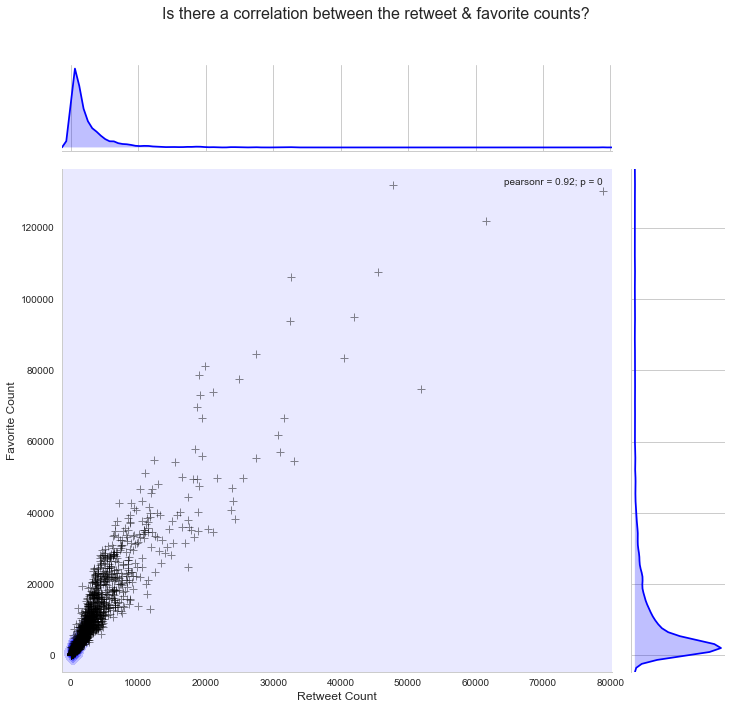

In [97]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=tweet_query_df, 
                  color="blue",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
sns.plt.suptitle('Is there a correlation between the retweet & favorite counts?',
                 fontsize=16)

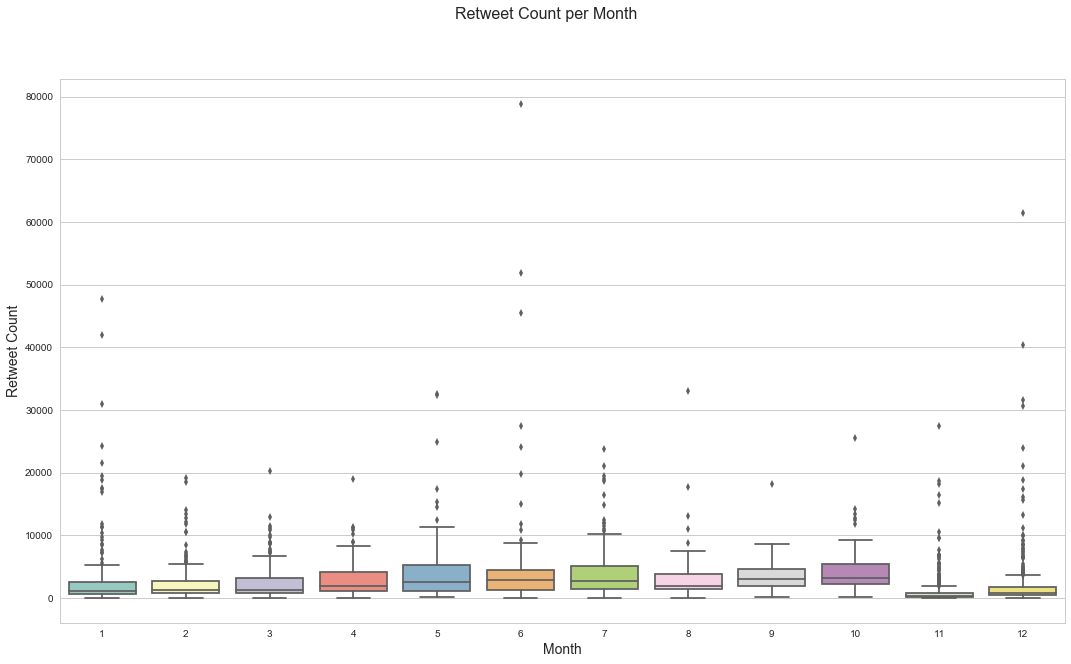

In [98]:
# Visualization comparing the retweet counts per month
plt.figure(figsize=(18, 10))
sns.boxplot(x="Month", 
            y="retweet_count",  
            data=tweet_query_df,
            palette="Set3")

#add title and fix spacing
sns.plt.suptitle('Retweet Count per Month',
                 fontsize=16)
sns.plt.xlabel("Month", fontsize=14)
sns.plt.ylabel("Retweet Count",fontsize=14)

As you can see, for any given month the majority of retweets averages less than 10,000. Activity spikes in the summer months with June containing the largest outlier with ~80,000 retweets. Of note, December has the largest statistical spread.

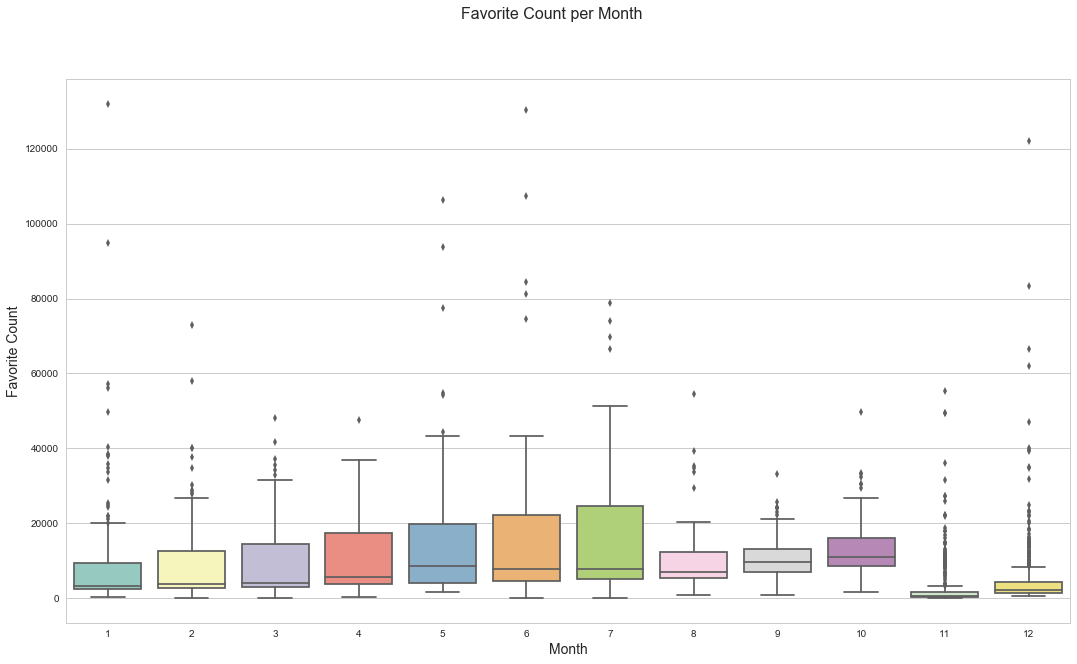

In [99]:
# Visualization comparing the favorite counts per month
plt.figure(figsize=(18, 10))
sns.boxplot(x="Month", 
            y="favorite_count",  
            data=tweet_query_df,
            palette="Set3")

#add title and fix spacing
sns.plt.suptitle('Favorite Count per Month',
                 fontsize=16)
sns.plt.xlabel("Month", fontsize=14)
sns.plt.ylabel("Favorite Count",fontsize=14)

As you can see from the visualization, there is a greater number of people “liking” a tweet as compared to the number of retweets. Notice how the favorite count increases steadily from January until it reaches it's maximum in July. I am curious as why the favorite count drops steeply below 20,000 in August. Similar to the retweet count data, November and December have the lowest tweet activity, with December having the largest statistical spread due to an average count of less than 5,000 and an outlier with more than 120,000 "likes".

## References


http://support.gnip.com/articles/identifying-and-understanding-retweets.html

http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.read_json.html

https://stackoverflow.com/questions/13707457/python-value-that-occurs-the-most-in-a-list

https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

https://chrisalbon.com/python/pandas_join_merge_dataframe.html